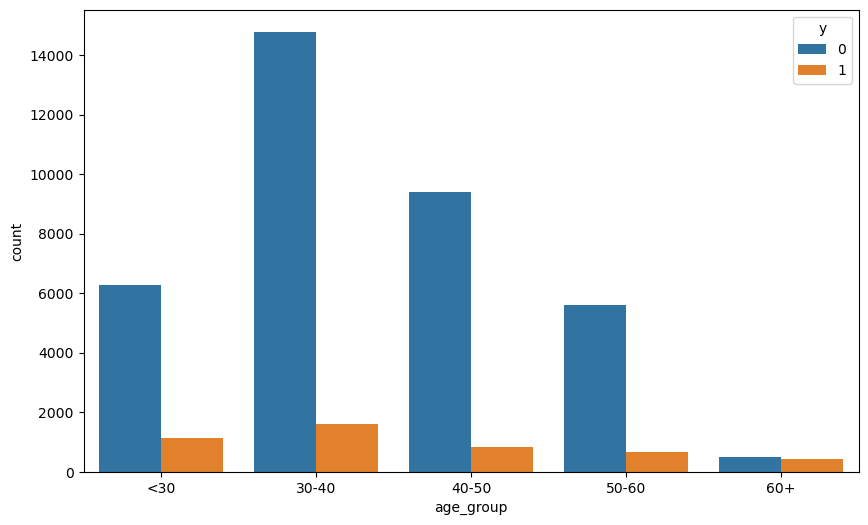

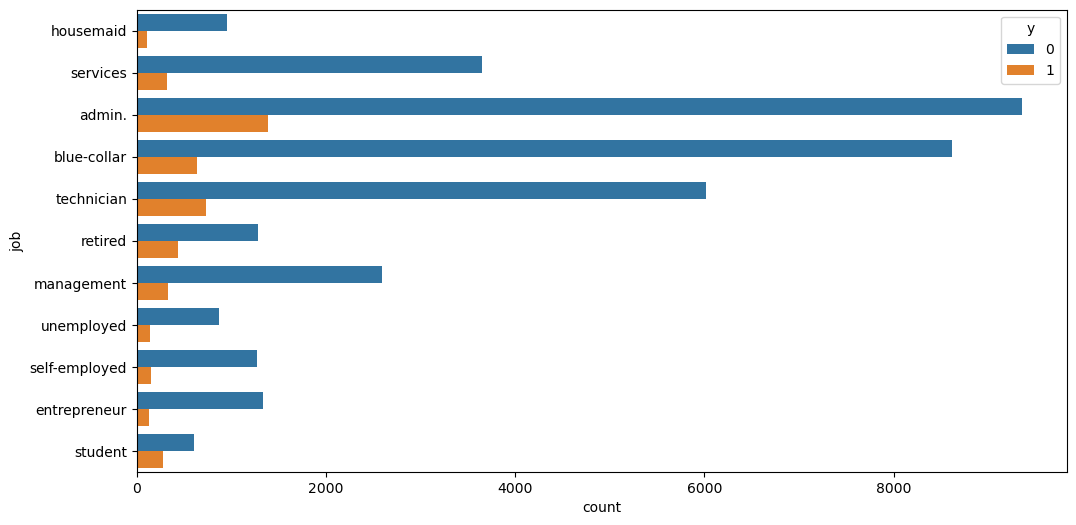

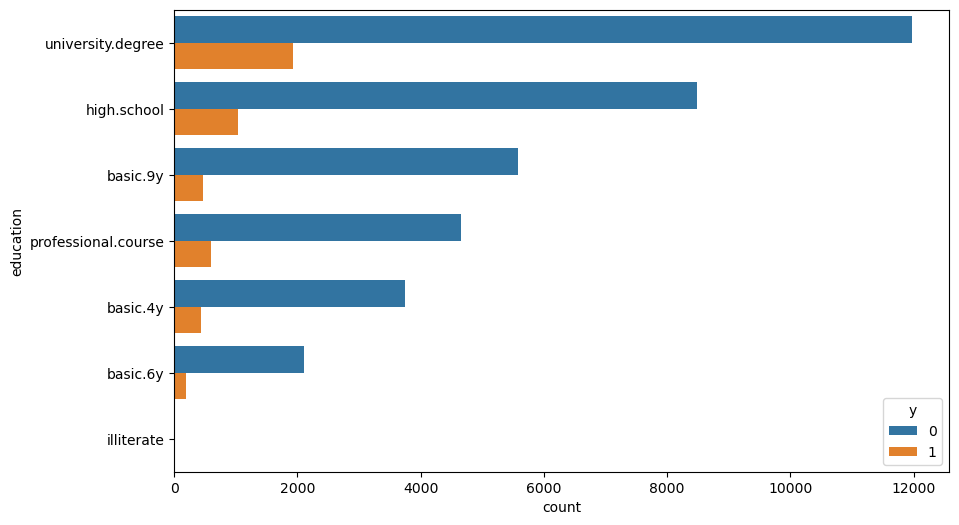

Accuracy: 0.910091446143886
[[10681   287]
 [  824   565]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10968
           1       0.66      0.41      0.50      1389

    accuracy                           0.91     12357
   macro avg       0.80      0.69      0.73     12357
weighted avg       0.90      0.91      0.90     12357

Accuracy: 0.9163227320547058
[[10595   373]
 [  661   728]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     10968
           1       0.66      0.52      0.58      1389

    accuracy                           0.92     12357
   macro avg       0.80      0.75      0.77     12357
weighted avg       0.91      0.92      0.91     12357



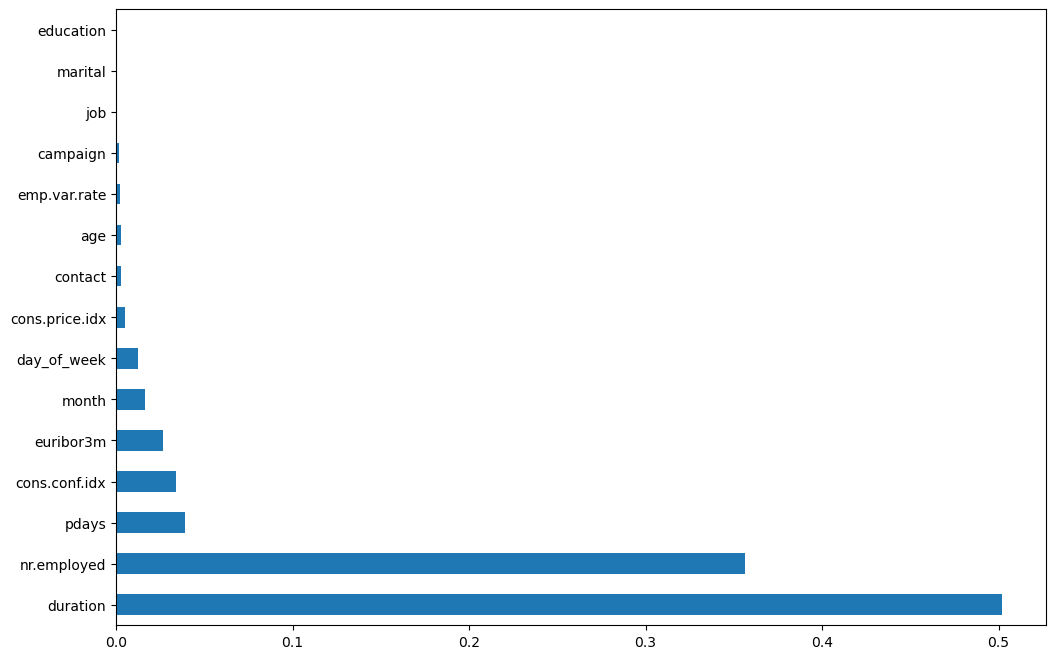

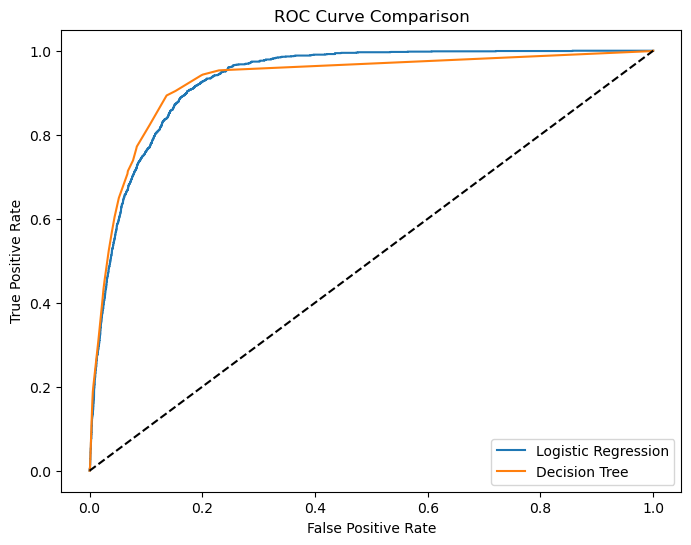

Logistic Regression AUC: 0.9316754440826353
Decision Tree AUC: 0.9263081054172123
age_group
60+      0.454945
<30      0.152242
50-60    0.106539
30-40    0.097467
40-50    0.081738
Name: y, dtype: float64
job
student          0.314286
retired          0.252326
unemployed       0.142012
admin.           0.129185
management       0.112175
technician       0.108260
self-employed    0.104856
housemaid        0.100000
entrepreneur     0.085165
services         0.081381
Name: y, dtype: float64
education
illiterate             0.222222
university.degree      0.138211
professional.course    0.113485
high.school            0.108355
basic.4y               0.102490
basic.6y               0.082024
basic.9y               0.078246
Name: y, dtype: float64
poutcome
success        0.651129
failure        0.142286
nonexistent    0.088322
Name: y, dtype: float64


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve

df = pd.read_csv('bank-additional-full.csv', sep=';')

df_clean = df.copy()
cat_cols = df_clean.select_dtypes(include=['object']).columns
for col in cat_cols:
    df_clean[col] = df_clean[col].replace('unknown', df_clean[col].mode()[0])
df_clean['y'] = df_clean['y'].map({'no':0, 'yes':1})
df_clean['age_group'] = pd.cut(df_clean['age'], bins=[0, 30, 40, 50, 60, 100], labels=['<30', '30-40', '40-50', '50-60', '60+'])

plt.figure(figsize=(10,6))
sns.countplot(x='age_group', hue='y', data=df_clean)
plt.show()

plt.figure(figsize=(12,6))
sns.countplot(y='job', hue='y', data=df_clean)
plt.show()

plt.figure(figsize=(10,6))
sns.countplot(y='education', hue='y', data=df_clean, order=df_clean['education'].value_counts().index)
plt.show()

features = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
            'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
            'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
            'cons.conf.idx', 'euribor3m', 'nr.employed']
X = df_clean[features].copy()
y = df_clean['y']

cat_cols = X.select_dtypes(include=['object']).columns
le = LabelEncoder()
X_encoded = X.copy()
for col in cat_cols:
    X_encoded[col] = le.fit_transform(X_encoded[col].astype(str))

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train_scaled, y_train)
y_pred_dt = dt.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

plt.figure(figsize=(12,8))
feat_importances = pd.Series(dt.feature_importances_, index=features)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

y_pred_prob_lr = lr.predict_proba(X_test_scaled)[:,1]
y_pred_prob_dt = dt.predict_proba(X_test_scaled)[:,1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_prob_lr)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_prob_dt)

plt.figure(figsize=(8,6))
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression')
plt.plot(fpr_dt, tpr_dt, label='Decision Tree')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

print("Logistic Regression AUC:", roc_auc_score(y_test, y_pred_prob_lr))
print("Decision Tree AUC:", roc_auc_score(y_test, y_pred_prob_dt))

age_analysis = df_clean.groupby('age_group', observed=True)['y'].mean().sort_values(ascending=False)
print(age_analysis)

job_analysis = df_clean.groupby('job')['y'].mean().sort_values(ascending=False)
print(job_analysis.head(10))

edu_analysis = df_clean.groupby('education')['y'].mean().sort_values(ascending=False)
print(edu_analysis)

pout_analysis = df_clean.groupby('poutcome')['y'].mean().sort_values(ascending=False)
print(pout_analysis)


## 🧾 Conclusion

### ✅ Key Findings:
1. The **Decision Tree model** slightly outperformed Logistic Regression with an accuracy of **91.6%** vs **91.0%**.
2. The **most influential features** for predicting personal loan acceptance were:
   - `duration`
   - `euribor3m`
   - `nr.employed`
   - `age`
   - `campaign`
3. **Customer segments** most likely to accept personal loans include:
   - Age group **60+** (highest acceptance rate ~45.5%)
   - **Students** (31.4%), **Retired** (25.2%), and **Unemployed** (14.2%)
   - Customers with **university degrees** or even **illiterate** background
   - Customers with a **successful outcome in previous campaigns** (~65.1%)

### 📌 Recommendations:
- Focus marketing efforts on:
  - **Older customers (60+)**
  - **University graduates** and **retired individuals**
  - Customers with **positive outcomes in previous campaigns**
- Reduce repeated contacts in a short period, as **higher campaign frequency** may decrease acceptance rate.
- Align campaigns with favorable **economic indicators** like `euribor3m` and `employment rate`.
- Consider tailored loan programs for **students** and the **unemployed** to tap into high-potential segments.
